I learned from the investigation below that weather doesn't seem to have a significant impact on the scores of baseball games. I originally thought wind and rain would cause lower scores, however that is not the case. Weather seems to have no statistical impact.

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
metadata = pd.read_csv("/Users/hannahwurzel/Desktop/MLB/metadata/metadata.csv")
metadata.head()

,game_date,game_loc,away_team,away_team_score,home_team,home_team_score,total_score,max_temp_C,min_temp_C,precipitation_mm,max_wind_speed_kmh,dominant_wind_dir_deg
0,2021-04-01,Angel Stadium of Anaheim,Chicago White Sox,3,Los Angeles Angels,4,7,14.6,10.3,0.6,22.3,60.0
1,2021-04-01,Wrigley Field,Pittsburgh Pirates,5,Chicago Cubs,3,8,7.4,-1.9,6.2,15.4,41.0
2,2021-04-01,Great American Ball Park,St. Louis Cardinals,11,Cincinnati Reds,6,17,12.4,2.2,0.0,27.8,84.0
3,2021-04-01,Coors Field,Los Angeles Dodgers,5,Colorado Rockies,8,13,10.4,1.1,0.6,21.2,325.0
4,2021-04-01,Comerica Park,Cleveland Indians,2,Detroit Tigers,3,5,-7.9,-12.7,3.3,10.2,83.0


In [55]:
metadata.isna().sum()

game_date                0
game_loc                 0
away_team                0
away_team_score          0
home_team                0
home_team_score          0
total_score              0
max_temp_C               0
min_temp_C               0
precipitation_mm         0
max_wind_speed_kmh       0
dominant_wind_dir_deg    0
dtype: int64

### Correlations

In [56]:
min_temp_corr = metadata["min_temp_C"].corr(metadata["total_score"])
max_temp_corr = metadata["max_temp_C"].corr(metadata["total_score"])
precip_corr = metadata["precipitation_mm"].corr(metadata["total_score"])
wind_corr = metadata["max_wind_speed_kmh"].corr(metadata["total_score"])
wind_dir_corr = metadata["dominant_wind_dir_deg"].corr(metadata["total_score"])
print(f"Correlation between min temp and total score: {min_temp_corr:.3f}")
print(f"Correlation between max temp and total score: {max_temp_corr:.3f}")
print(f"Correlation between precipitation and total score: {precip_corr:.3f}")
print(f"Correlation between max wind speed and total score: {wind_corr:.3f}")
print(f"Correlation between wind direction and total score: {wind_dir_corr:.3f}")

Correlation between min temp and total score: 0.015
Correlation between max temp and total score: 0.026
Correlation between precipitation and total score: -0.015
Correlation between max wind speed and total score: 0.035
Correlation between wind direction and total score: 0.006


### Cross Segmentation

In [57]:
print(metadata['max_wind_speed_kmh'].describe())

count    10098.000000
mean        19.204229
std          9.322735
min          2.800000
25%         12.100000
50%         17.400000
75%         24.300000
max         72.000000
Name: max_wind_speed_kmh, dtype: float64


<Axes: title={'center': 'Cross Segmentation: Weather and Wind'}, xlabel='segment_combo', ylabel='total_score'>

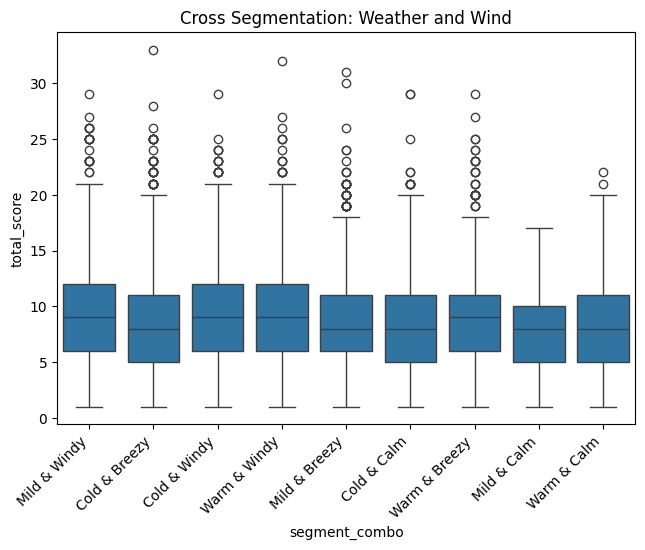

In [58]:
# Cross Segmentation: Weather and Wind
def temp_label(x):
    if x < 10:
        return "Cold"
    elif x < 20:
        return "Mild"
    else:
        return "Warm"

def wind_label(x):
    if x < 10:
        return "Calm"
    elif x < 20:
        return "Breezy"
    else:
        return "Windy"

metadata["avg_temp"] = (metadata["min_temp_C"] + metadata["max_temp_C"]) / 2
metadata["temp_segment"] = metadata["min_temp_C"].apply(temp_label)
metadata["wind_segment"] = metadata["max_wind_speed_kmh"].apply(wind_label)

metadata["segment_combo"] = metadata["temp_segment"] + " & " + metadata["wind_segment"]

# Visualize
plt.title("Cross Segmentation: Weather and Wind")
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels properly
plt.tight_layout() # Adjusts plot parameters for a tight layout
sns.boxplot(data=metadata, x="segment_combo", y="total_score")


In [59]:
print(metadata['precipitation_mm'].describe())

count    10098.000000
mean         2.279531
std          6.731922
min          0.000000
25%          0.000000
50%          0.000000
75%          1.400000
max        180.100000
Name: precipitation_mm, dtype: float64


<Axes: title={'center': 'Cross Segmentation: Weather and Precipitation'}, xlabel='segment_combo', ylabel='total_score'>

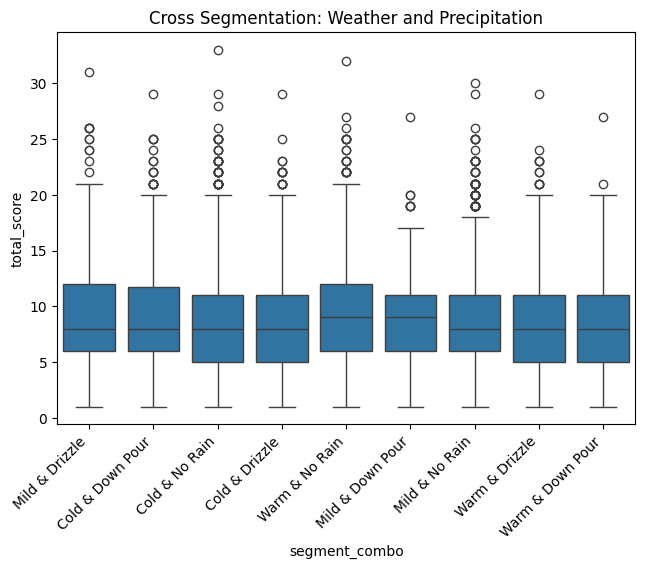

In [60]:
# Cross Segmentation: Weather and Precipitation
def temp_label(x):
    if x < 10:
        return "Cold"
    elif x < 20:
        return "Mild"
    else:
        return "Warm"

def rain_label(x):
    if x <= 0:
        return "No Rain"
    elif x < 3:
        return "Drizzle"
    else:
        return "Down Pour"

metadata["avg_temp"] = (metadata["min_temp_C"] + metadata["max_temp_C"]) / 2
metadata["temp_segment"] = metadata["min_temp_C"].apply(temp_label)
metadata["rain_segment"] = metadata["precipitation_mm"].apply(rain_label)

metadata["segment_combo"] = metadata["temp_segment"] + " & " + metadata["rain_segment"]

# Visualize
plt.title("Cross Segmentation: Weather and Precipitation")
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels properly
plt.tight_layout() # Adjusts plot parameters for a tight layout
sns.boxplot(data=metadata, x="segment_combo", y="total_score")


<Axes: title={'center': 'Cross Segmentation: Wind and Precipitation'}, xlabel='segment_combo', ylabel='total_score'>

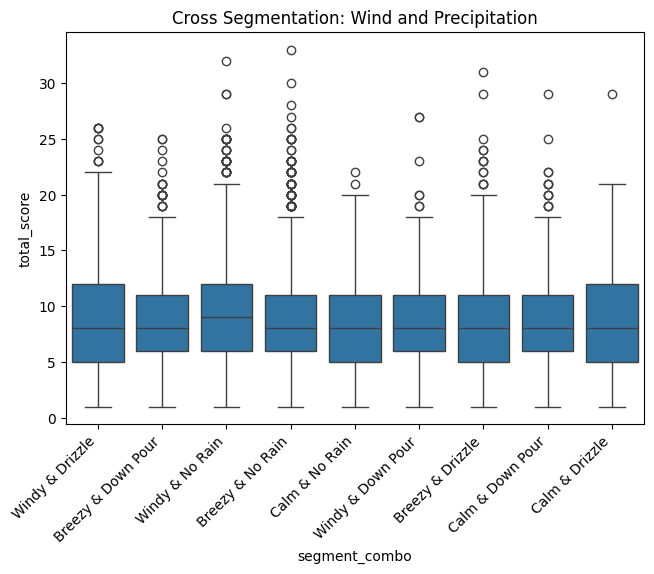

In [64]:
# Cross Segmentation: Wind and Precipitation
def wind_label(x):
    if x < 10:
        return "Calm"
    elif x < 20:
        return "Breezy"
    else:
        return "Windy"

def rain_label(x):
    if x <= 0:
        return "No Rain"
    elif x < 3:
        return "Drizzle"
    else:
        return "Down Pour"

metadata["wind_segment"] = metadata["max_wind_speed_kmh"].apply(wind_label)
metadata["rain_segment"] = metadata["precipitation_mm"].apply(rain_label)

metadata["segment_combo"] = metadata["wind_segment"] + " & " + metadata["rain_segment"]

# Visualize
plt.title("Cross Segmentation: Wind and Precipitation")
plt.xticks(rotation=45, ha='right') # ha='right' aligns the rotated labels properly
plt.tight_layout() # Adjusts plot parameters for a tight layout
sns.boxplot(data=metadata, x="segment_combo", y="total_score")
